<a href="https://colab.research.google.com/github/kimheeseo/python/blob/main/cha02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**확률 모델과 최대 우도 추정**

In [ ]:
# 확률 모델과 최대 우도 추정: 딥러닝 모델 중에서도 가장 많이 사용되는 중요한 프레임워크.

**파이토치로 선형 회귀 모델 만들기: 직접 만들기(y=1+2x+3x)**

In [17]:
import torch

w_true=torch.Tensor([1,2,3])

# X 데이터 준비
X=torch.cat([torch.ones(100,1), torch.randn(100,2)],1)
print('X값:',X)
print('X.size()값:',X.size())

X값: tensor([[ 1.0000, -0.3729,  0.6442],
        [ 1.0000,  1.0660, -1.1765],
        [ 1.0000,  0.4833,  0.6984],
        [ 1.0000, -0.9624, -0.5116],
        [ 1.0000,  2.7408, -0.9850],
        [ 1.0000,  0.5641, -1.4708],
        [ 1.0000, -0.2434,  1.7010],
        [ 1.0000,  0.4437,  0.2047],
        [ 1.0000,  1.5666, -1.2767],
        [ 1.0000,  0.0118,  0.5919],
        [ 1.0000, -0.2681, -1.0610],
        [ 1.0000,  1.2352, -2.1998],
        [ 1.0000,  1.3816, -0.4128],
        [ 1.0000, -0.2747,  0.0228],
        [ 1.0000,  1.3532, -0.3172],
        [ 1.0000,  0.1052, -1.3513],
        [ 1.0000, -0.3726,  0.3361],
        [ 1.0000, -1.0808,  0.1030],
        [ 1.0000,  0.3541, -0.1870],
        [ 1.0000,  0.3976,  1.0330],
        [ 1.0000, -0.4969, -0.4826],
        [ 1.0000,  0.5331,  1.0143],
        [ 1.0000,  0.4065,  1.6785],
        [ 1.0000, -0.7747, -0.4796],
        [ 1.0000, -1.1751,  0.1268],
        [ 1.0000, -1.3024, -0.6065],
        [ 1.0000, -0.8598,  0.6337

In [30]:
# 참의 계수와 각 X의 내적을 행렬과 벡터의 곱으로 모아서 계산
y=torch.mv(X, w_true)+torch.randn(100)*0.5

# 기울기 하강으로 최적화하기 위해 파라미터 Tensor를 난수로 초기화해서 생성
w=torch.randn(3, requires_grad=True)

# 학습률
gamma=0.1

In [31]:
# 손실함수의 로그
losses=[]

# 100회 반복
for epoc in range(100):
  # 전회의 backward 메서드로 계산된 경사값을 초기화
  w.grad=None

  # 선형 모델로 y예측값을 계산
  y_pred=torch.mv(X,w)

  # MSE loss와 w에 의한 미분을 계산
  loss=torch.mean((y-y_pred)**2)
  loss.backward()

  # 경사를 갱신한다.
  w.data=w.data-gamma*w.grad.data

  # 수렴 확인을 위한 loss를 기록해둔다.
  losses.append(loss.item())

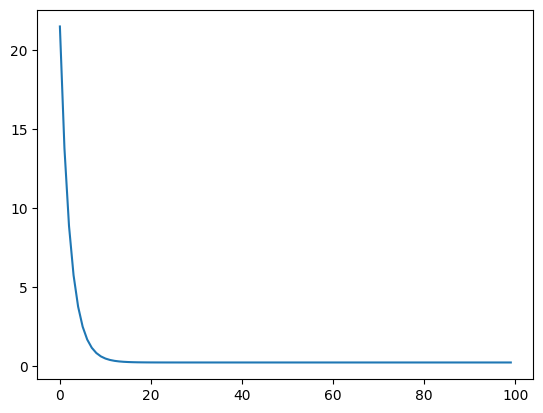

In [32]:
from matplotlib import pyplot as plt
plt.plot(losses)

In [33]:
w

tensor([0.9318, 1.9710, 3.0339], requires_grad=True)

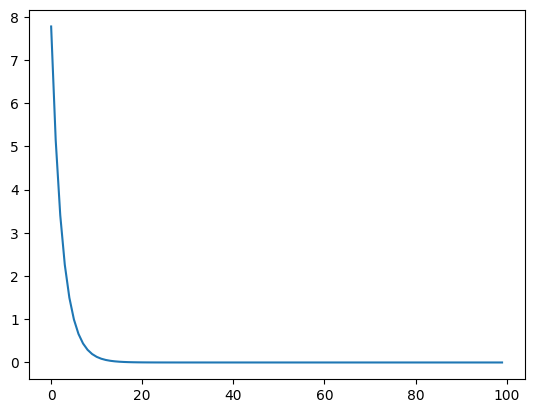

In [16]:
# y=torch.mv(X, w_true)+torch.randn(100)*0.5 -> y=torch.mv(X, w_true)

import torch

w_true=torch.Tensor([1,2,3])

# X 데이터 준비
X=torch.cat([torch.ones(100,1), torch.randn(100,2)],1)

# 참의 계수와 각 X의 내적을 행렬과 벡터의 곱으로 모아서 계산
y=torch.mv(X, w_true)

# 기울기 하강으로 최적화하기 위해 파라미터 Tensor를 난수로 초기화해서 생성
w=torch.randn(3, requires_grad=True)

# 학습률
gamma=0.1

# 손실함수의 로그
losses=[]

# 100회 반복
for epoc in range(100):
  # 전회의 backward 메서드로 계산된 경사값을 초기화
  w.grad=None

  # 선형 모델로 y예측값을 계산
  y_pred=torch.mv(X,w)

  # MSE loss와 w에 의한 미분을 계산
  loss=torch.mean((y-y_pred)**2)
  loss.backward()

  # 경사를 갱신한다.
  w.data=w.data-gamma*w.grad.data

  # 수렴 확인을 위한 loss를 기록해둔다.
  losses.append(loss.item())

from matplotlib import pyplot as plt
plt.plot(losses)

**파이토치로 선형 회귀 모델 만들기**

In [41]:
from torch import nn, optim

X=torch.cat([torch.ones(100,1), torch.randn(100,2)],1)
y=torch.mv(X, w_true)+torch.randn(100)*0.5
w=torch.randn(3, requires_grad=True)

# Linear층 작성.
net=nn.Linear(in_features=3, out_features=1, bias=False)

# SGC의 최적화기상에서 정의한 네트워크의 파라미터를 전달해서 초기화
optimizer=optim.SGD(net.parameters(), lr=0.1)

# MSE loss 클래스
loss_fn=nn.MSELoss()

In [42]:
import torch

# X 데이터 준비

losses=[] # 손실 함수 로그

for epoc in range(100):
  optimizer.zero_grad() # 전회의 backward 메서드로 계산된 경사값을 초기화

  y_pred=net(X) # 선형 모델으로 y 예측값을 계산

  loss=loss_fn(y_pred.view_as(y),y) # MSE Loss 계산

  loss.backward() # loss의 w를 사용한 미분 계산

  optimizer.step() # 경사를 갱신한다.

  losses.append(loss.item())

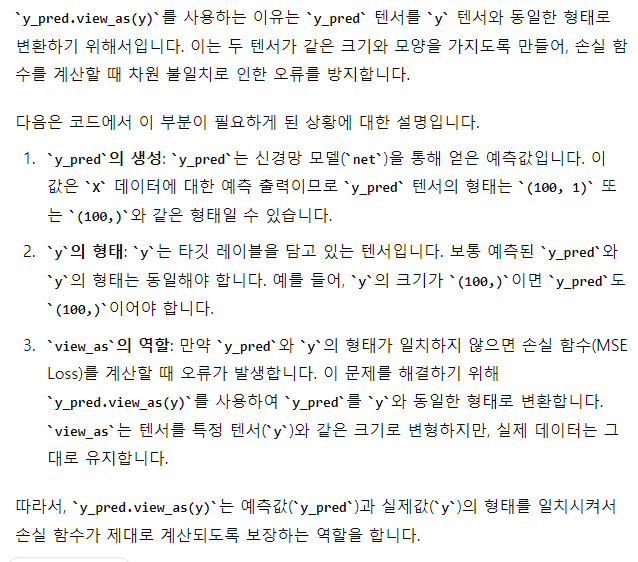

In [43]:
# 수렴한 모델의 파라미터 확인
list(net.parameters())

[Parameter containing:
 tensor([[1.0514, 1.9927, 2.9835]], requires_grad=True)]

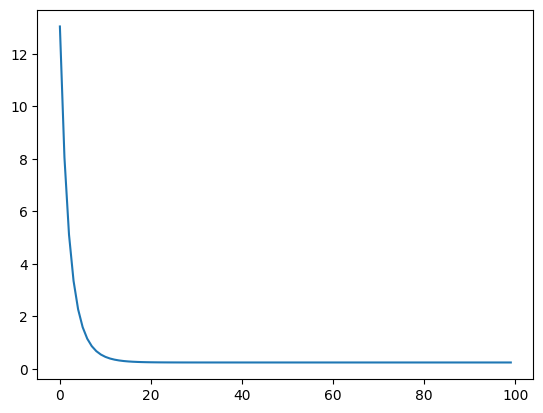

In [44]:
from matplotlib import pyplot as plt
plt.plot(losses)

**로지스틱 회귀**

In [45]:
# 로지스틱 회귀에서는 y는 [0,1]의 이산값으로 분류 대상이 두 개인 문제가 된다.
# 분류 처리 예로 자주 사용되는 iris 데이터를 이용해서 로지스틱 회귀를 실행해보도록 하겠다.

import torch
from torch import nn, optim
from sklearn.datasets import load_iris
iris=load_iris()

x=iris.data[:100]
y=iris.target[:100]

# Numpy의 ndarray를 Pytorch의 Tensor로 변환
x=torch.tensor(x, dtype=torch.float32)
y=torch.tensor(y, dtype=torch.float32)

In [47]:
x[1:10]

tensor([[4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000]])

In [48]:
y[1:10]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [50]:
# 모델 작성
net=nn.Linear(4,1) # iris 데이터는 4차원: x[1:10]을 통해 알 수 있다.

# 시그모이드 함수를 적용해서 두 클래스의 분류를 위한 크로스 엔트로피 계산
loss_fn=nn.BCEWithLogitsLoss()

# SGD
optimizer=optim.SGD(net.parameters(), lr=0.25)

In [51]:
# 파라미터 최적화를 위한 반복 루프
# 손실 함수 로그
losses=[]

for epoc in range(100):
  optimizer.zero_grad()

  y_pred=net(x) # 선형 모델으로 y예측값을 계산

  loss=loss_fn(y_pred.view_as(y),y) # MSE loss를 사용한 미분 계산
  loss.backward()

  optimizer.step() # 경사를 갱신한다.

  losses.append(loss.item())

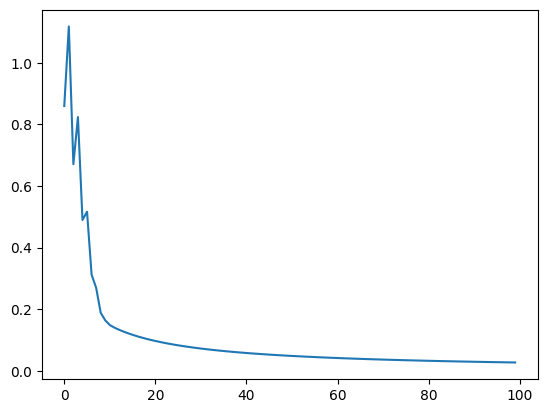

In [52]:
from matplotlib import pyplot as plt
plt.plot(losses)

In [53]:
# 모델 작성
h=net(x)

prob=nn.functional.sigmoid(h)

y_pred=prob>0.5 # 확률이 0.5 이상인 것을 클래스 1로 예측하고 그 외는 0으로 한다.

(y.byte() == y_pred.view_as(y)).sum().item() # 예측 결과 확인

100

In [55]:
y

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [56]:
y.byte()

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1], dtype=torch.uint8)

**다중 분류를 위한 로지스틱 회귀 분석**

In [64]:
# 선형 결합 계층의 출력을 1차원이 아닌 분류의 차원으로 만들고, 손실 함수를 소프트맥스 크로스 엔트로피라는 함수로 변경하기만 하면 된다.
import torch
from torch import nn, optim
from sklearn.datasets import load_digits
digits=load_digits()

x=digits.data
y=digits.target

x=torch.tensor(x, dtype=torch.float32)
y=torch.tensor(y, dtype=torch.int64)

# 출력은 10차원
net=nn.Linear(x.size()[1], 10)

# 소프트맥스 크로스 엔트로피
loss_fn=nn.CrossEntropyLoss()

# SGD
optimizer=optim.SGD(net.parameters(), lr=0.01)

In [65]:
print('x.size()[0]:',x.size()[0],'x.size()[1]값:',x.size()[1])

x.size()[0]: 1797 x.size()[1]값: 64


In [70]:
x.size()

torch.Size([1797, 64])

In [67]:
# 학습용 반복 처리
losses=[] # 손실 함수 로그

for epoc in range(100):
  optimizer.zero_grad()

  y_pred=net(x)

  # MSE loss 미분 계산
  loss=loss_fn(y_pred, y)
  loss.backward()

  # 경사를 갱신한다.
  optimizer.step()

  # 수렴 확인을 위한 loss를 기록해둔다.
  losses.append(loss.item())

In [69]:
# 정답
_, y_pred=torch.max(net(x),1)

(y_pred==y).sum().item()/len(y)

0.9510294936004452

In [71]:
(y_pred==y).sum()

tensor(1709)

In [72]:
(y_pred==y).sum().item() # Tensor변수에서 값만 가져오기: item()

1709